In [1]:
# DELETE BEFORE SUBMITING
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MATEJ/cs320/s22/p5_new/
%ls
!pip install rasterio -qqqq

Mounted at /content/drive
/content/drive/MyDrive/MATEJ/cs320/s22/p5_new
 counties.geojson        land.zip    q15.png             tester.py    tracts.prj
 counties_tracts.db      mp5.ipynb   q2.png              test.json    tracts.shp
 grading-guidelines.md   q11.png     README.md           tracts.cpg   tracts.shx
 key.csv                 q13.png    'Run tester.ipynb'   tracts.dbf
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 24.6 MB/s eta 0:00:00


In [2]:
# project: p5
# submitter: popovski
# partner: none
# hours: 7

In [3]:
#q1
import geopandas as gdp
df = gdp.read_file("counties.geojson")
len(set(df["NAME"]))

72

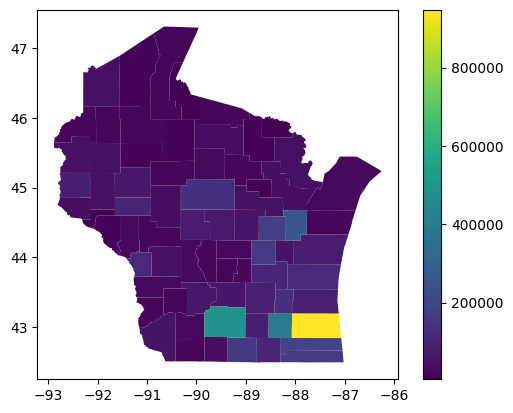

In [4]:
#q2
ax = df.plot(column="POP100", legend=True)

In [5]:
#q3
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
conn = sqlite3.connect("counties_tracts.db")
counties = pd.read_sql("SELECT * FROM counties", conn)["AREALAND"]
df["AREALAND"] = counties
train, test = train_test_split(df, random_state = 250, test_size = 0.25)

test["NAME"].tolist()

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [6]:
#q4
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train[["AREALAND"]],train["POP100"])
model.score(test[["AREALAND"]],test["POP100"])

0.016720430179409274

In [7]:
#q5
square_km = 600 * 2.59
square_m = 1000**2 * square_km
miles_df = pd.DataFrame({"AREALAND": square_m}, index=[0])
model.predict(miles_df)[0]

78504.52061277494

In [8]:
#q6
counties_hu = pd.read_sql("""
    SELECT SUM(tracts.HU100) as HU100, counties.NAME
    FROM tracts
    LEFT JOIN counties ON tracts.COUNTY = counties.COUNTY
    GROUP BY counties.NAME
""", conn)

df = pd.merge(df, counties_hu, how = 'inner', on = 'NAME')
train, test = train_test_split(df, random_state = 250, test_size = 0.25)

list(test['NAME'])

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [9]:
#q7
values = {}
test_df = pd.DataFrame(test).reset_index()
del test_df["index"]
for index in test_df.index:
    values[test_df["NAME"][index]] = test_df["HU100"][index]
values

{'Dane County': 216022,
 'Juneau County': 14669,
 'Taylor County': 10582,
 'Vilas County': 25116,
 'Rusk County': 8883,
 'Price County': 11120,
 'Jackson County': 9727,
 'Waushara County': 14843,
 'Pepin County': 3579,
 'Douglas County': 22825,
 'Ashland County': 9656,
 'Milwaukee County': 418053,
 'Waupaca County': 25396,
 'Richland County': 8868,
 'Lafayette County': 7230,
 'Washburn County': 12979,
 'Dunn County': 17964,
 'Bayfield County': 12999}

In [10]:
#q8
from sklearn.model_selection import cross_val_score
model = LinearRegression()
model.fit(train[["HU100"]], train["POP100"])
scores = cross_val_score(model, train[["HU100"]], train["POP100"])
scores.mean()

0.9739348181232653

In [11]:
#q9
scores.std()

0.01693954236334351

In [12]:
#q10
model.fit(train[['HU100']], train['POP100'])
coef = round(model.coef_[0], 2)
intercept = round(model.intercept_, 2)
f"POP100 = {coef}*HU100 + {intercept}"

'POP100 = 2.47*HU100 + -9276.89'

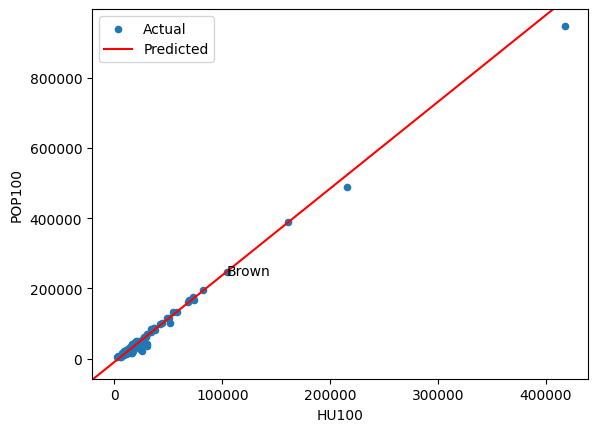

In [13]:
#q11
brown_pop = df.drop(columns = ["geometry", "AREALAND",
                   "HU100"]).set_index('NAME').to_dict()["POP100"]['Brown County']
brown_hu100 = df.set_index('NAME')['HU100']['Brown County']
ax = df.plot.scatter(x='HU100', y='POP100', label = 'Actual')
ax.axline((0, intercept), slope = coef, color = 'r', label = 'Predicted')
ax.text(y=brown_pop, x = brown_hu100, s="Brown", verticalalignment = "center")
ax.legend(frameon=True)
None

In [14]:
#q12
import numpy as np
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])
len(A[(3 <= A) & (6 >= A)])

8

In [15]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.mask import mask
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

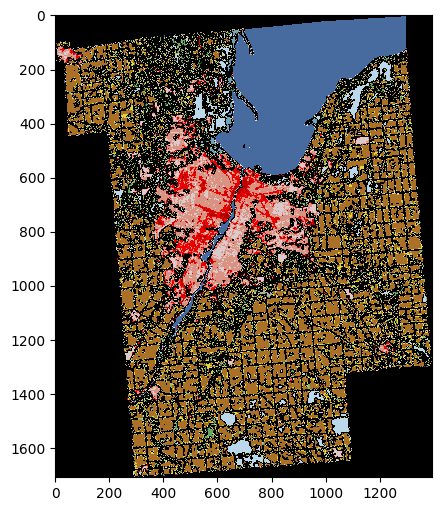

In [16]:
#q13
land = rasterio.open("zip://../p6/land.zip!wi.tif")
brown = gdp.GeoDataFrame(df.set_index("NAME")['geometry'].loc[["Brown County"]])

matrix, _ = mask(land, brown.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(matrix, vmin=0, vmax=255, cmap = custom_cmap)

In [17]:
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

In [18]:
#q14
brown_total = (matrix != 0).astype(int).sum()
brown_water = (matrix == land_use['open_water']).astype(int).sum()
brown_water / brown_total

0.13797526789725206

In [19]:
def check_proportion(df, interest, col):
    df = df
    di = []
    num_key = land_use[interest]
    for county in df[col]:
        geo_df = gdp.GeoDataFrame(df.set_index("NAME")['geometry'].loc[[county]])
        matrix, _ = mask(land, geo_df.to_crs(land.crs)["geometry"], crop=True)
        matrix = matrix[0]
        check_area = (matrix == num_key).astype(int).sum()
        total_area = (matrix != 0).astype(int).sum()
        di.append(check_area / total_area)
    return di


Text(0.5, 0, 'Highly Developed Cells in Country')

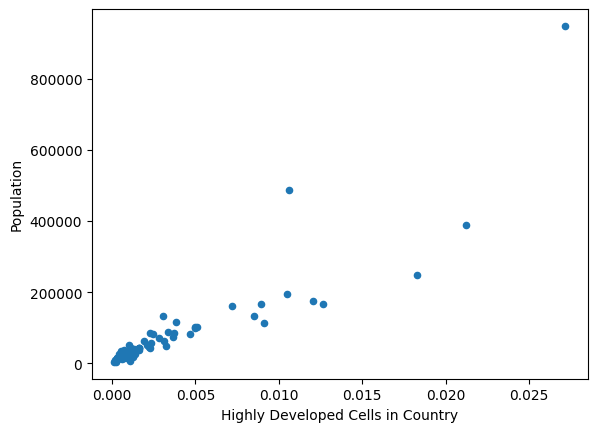

In [20]:
#q15
di = check_proportion(df, "developed_high", "NAME")
df['prop'] = di
ax = df.plot.scatter(x = "prop", y = "POP100")
ax.set_ylabel("Population")
ax.set_xlabel("Highly Developed Cells in Country")

In [21]:
tdf = gdp.read_file("tracts.shp")

# Function to add land use type area and percentage to GeoDataFrame
def check2(interest):
    num_key = land_use[interest]
    percent_list = []
    check_area_list = []
    for geoid in tdf['GEOID']:
        county = gdp.GeoDataFrame(tdf.set_index('GEOID')['geometry'].loc[[geoid]])
        matrix, _ = mask(land, county.to_crs(land.crs)["geometry"], crop=True)
        matrix = matrix[0]
        area_total = (matrix != 0).astype(int).sum()
        check_area = (matrix == num_key).astype(int).sum()
        check_area_list.append(check_area)
        percent_list.append(check_area / area_total)
    tdf[interest] = percent_list
    tdf[interest + "_total"] = check_area_list

check2("developed_med")

train, test = train_test_split(tdf, random_state = 300, test_size = 0.20)

In [22]:
m1 = LinearRegression()
m1.fit(train[["developed_med"]], train["POP100"])
scores1 = cross_val_score(m1, train[["developed_med"]], train["POP100"])
print("mean: ", scores1.mean())
print("std: ", scores1.std())

mean:  0.028543522205982774
std:  0.014146607735466424


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

m2 = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])

m2.fit(train[["developed_med_total"]], train["POP100"])
scores2 = cross_val_score(m2, train[["developed_med_total"]], train["POP100"])
print("mean: ", scores2.mean())
print("std: ", scores2.std())

mean:  0.41543360139018776
std:  0.04676493152971399


Text(0, 0.5, 'R^2 Score')

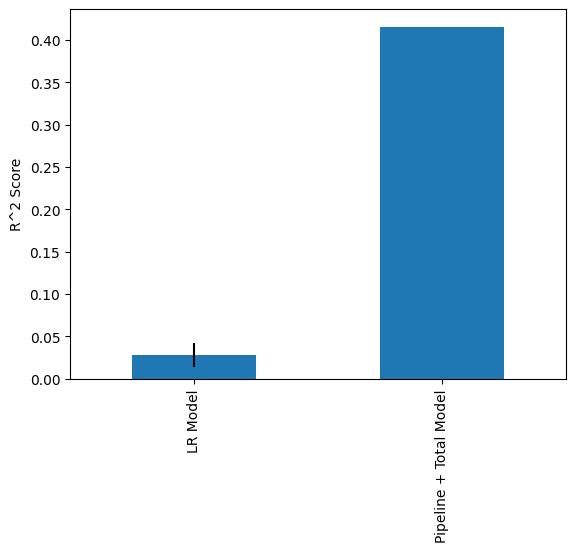

In [24]:
#q16:

# The graph displays the mean cross-validation scores and their
# standard deviations (as error bars) for two different regression
# models: a linear regression model and a polynomial regression model
# (degree 2). The y-axis represents the R^2 score, which measures
# the proportion of variance in the dependent variable that is
# predictable from the independent variables. Higher R^2 scores
# indicate better model performance.
#
# While m1 is trying to use a linear model on the % of area that is
# "developed_med", m2 is the final, and most simple and effective
# model, using 2 degree PolynomialFeatures and the total area
# covered by "developed_med". Clearly, m2 is much more accurate.
#
# The polynomial model exhibits a higher mean R^2 score than the
# linear model, suggesting it captures the relationship between the
# features and the target variable more effectively.
# The error bars represent the standard deviation of the R^2 scores
# across different folds in the cross-validation. A smaller error bar
# in the polynomial model indicates more consistent performance across
# different subsets of the data, which implies lower variance and
# higher reliability.
#
# The improved performance of the polynomial model can guide the choice
# of model complexity when developing further models. It suggests that
# incorporating non-linear relationships between features and the
# target can be beneficial.
# This information might lead us to experiment with higher degrees
# of polynomial features or other types of transformations and
# interactions among features to capture more complex patterns in the data.
# Understanding the variance in model performance can also influence
# decisions about model robustness, especially in scenarios where
# data might vary or be noisy.

avg = pd.Series({"LR Model": scores1.mean(), "Pipeline + Total Model": scores2.mean()})
std = pd.Series({"LR Model": scores1.std(), "Pipeline  + Total Model": scores2.std()})
ax = avg.plot.bar(yerr=std)
ax.set_ylabel("R^2 Score")

In [25]:
#q17:

# For this prediction task, I recommend the polynomial regression
# model for several reasons. The polynomial model has a higher mean
# cross-validation score, indicating it generally performs better in
# predicting the target variable, POP100, from the given feature
# (developed_med_total). The lower variance (as seen from the
# smaller standard deviation in cross-validation scores) of the
# polynomial model suggests it is more robust and reliable across
# different subsets of the data. This is crucial for ensuring the
# model performs well not just on the training data but also on unseen
# data. While the polynomial model is slightly more complex than a
# simple linear model, the increase in complexity is justified by a
# significant improvement in performance. The use of a second-degree
# polynomial is still relatively simple but provides a beneficial
# trade-off by capturing more complex relationships in the data
# without being overly intricate or computationally expensive.
# The increased accuracy and reliability of the polynomial model
# make it more suitable for applications where predictions of
# population based on land use are critical, such as urban planning
# and resource allocation. The model's simplicity ensures it remains
# interpretable and manageable, which is often important in
# policy-making contexts where decisions need to be explained and
# justified. By selecting the polynomial model, we are prioritizing
# both accuracy and reliability, ensuring the model not only predicts
# well on average but also maintains consistent performance across
# different scenarios.

m2.score(test[["developed_med_total"]], test["POP100"])

0.41102857525925784